<a href="https://colab.research.google.com/github/Qaidsaher/Diabetes-Outcome-Prediction-linear-regression/blob/main/Diabetes_Outcome_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the diabetes dataset located at "diabetes_dataset.csv" using Linear Regression to predict the 'Outcome' based on other health features. The analysis should include data exploration, data splitting (70/30 train/test split with a seed based on the last 5 digits of a university ID), feature scaling using training set statistics, model training and evaluation (R², MAE, RMSE), visualization of predicted vs. actual values and residuals, and interpretation of the learned model coefficients to identify influential features. Ensure all steps are clearly explained and results are presented with appropriate visualizations and metrics.

## Load the dataset



Import pandas and load the dataset into a DataFrame.



In [35]:
import pandas as pd

df = pd.read_csv('/content/diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Explore the data



Display the sample size, list of attributes, and the first 5 rows of the dataset.



In [36]:
print("Sample size (rows, columns):", df.shape)
print("\nList of attributes:")
print(df.columns.tolist())
print("\nFirst 5 rows of the dataset:")
display(df.head())

Sample size (rows, columns): (768, 9)

List of attributes:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Seed extraction

In [38]:
UNIVERSITY_ID = "s444123434545"
seed_digits = ''.join([c for c in UNIVERSITY_ID if c.isdigit()])
SEED = int(seed_digits[-5:]) if len(seed_digits) >= 5 else 12345
np.random.seed(SEED)
print(f"[INFO] UNIVERSITY_ID='{UNIVERSITY_ID}' -> SEED={SEED}")

[INFO] UNIVERSITY_ID='s444123434545' -> SEED=34545


## Split the data




Create X and y dataframes and split them into training and testing sets using the train_test_split function.



In [39]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (537, 8)
Shape of X_test: (231, 8)
Shape of y_train: (537,)
Shape of y_test: (231,)


## Scale the data




Import StandardScaler, instantiate it, fit it on the training data, and transform both training and testing data as instructed.



In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (537, 8)
Shape of X_test_scaled: (231, 8)


## Train the model


Train a Linear Regression model on the scaled training data.



In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluate the model



Make predictions on the scaled test data and calculate the R² score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). Then print these metrics.



In [42]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared (R²): 0.3088
Mean Absolute Error (MAE): 0.3286
Root Mean Squared Error (RMSE): 0.4019


## Visualize results




Create a parity plot and a residuals plot to visualize the model's performance.
 Visualization: Actual vs Predicted + Residuals Plot (Side by Side)




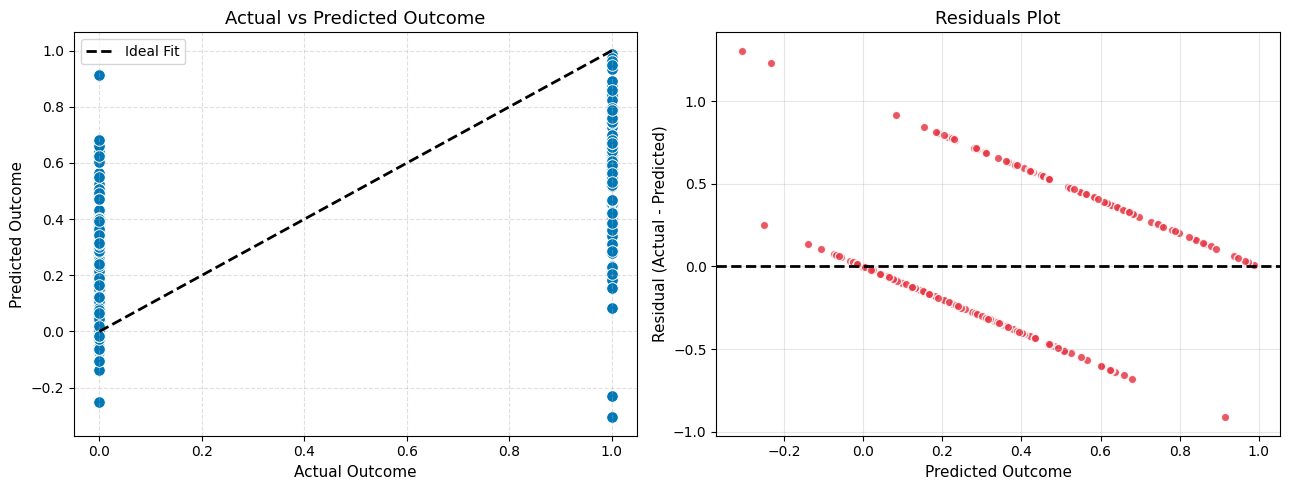

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create a figure
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

#  Actual vs Predicted (Parity Plot)
sns.scatterplot(x=y_test, y=y_pred, color="#0077b6", edgecolor="white", s=70, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'k--', lw=2, label="Ideal Fit")
axes[0].set_xlabel("Actual Outcome", fontsize=11)
axes[0].set_ylabel("Predicted Outcome", fontsize=11)
axes[0].set_title("Actual vs Predicted Outcome", fontsize=13)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.4)

#  Residuals Plot
residuals = y_test.values - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.85, color="#e63946", edgecolor="white")
axes[1].axhline(0.0, linestyle='--', linewidth=2, color='black')
axes[1].set_title("Residuals Plot", fontsize=13)
axes[1].set_xlabel("Predicted Outcome", fontsize=11)
axes[1].set_ylabel("Residual (Actual - Predicted)", fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Display model coefficients




Access and print the learned coefficients and intercept of the trained linear regression model.



In [44]:
print("Learned Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nLearned Intercept:")
print(f"Intercept: {model.intercept_:.4f}")

Learned Coefficients:
Pregnancies: 0.0681
Glucose: 0.1908
BloodPressure: -0.0394
SkinThickness: -0.0158
Insulin: -0.0183
BMI: 0.0907
DiabetesPedigreeFunction: 0.0459
Age: 0.0284

Learned Intercept:
Intercept: 0.3389


## Explain feature influence


Based on the previous output, the learned coefficients are available. I will examine these coefficients to identify the most influential features and provide an explanation.



In [46]:
print("Explanation of feature influence based on learned coefficients:")
print("The magnitude of the coefficient indicates the strength of the influence, with larger absolute values having a stronger impact.")
print("Positive coefficients suggest that as the feature value increases, the predicted outcome (likelihood of diabetes) increases, holding other features constant.")
print("Negative coefficients suggest that as the feature value increases, the predicted outcome decreases, holding other features constant.")
print("\nBased on the learned coefficients:")

# Assuming the coefficients are already stored in model.coef_ and feature names in X.columns
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

print("\nFeatures with the strongest positive influence:")
# Display top positive coefficients
print(coefficients[coefficients > 0].head())

print("\nFeatures with the strongest negative influence:")
# Display top negative coefficients (sorted by absolute value descending)
print(coefficients[coefficients < 0].abs().sort_values(ascending=False).head())

print("\nInterpretation:")
print(f"- The feature with the largest positive coefficient is '{coefficients.index[0]}'. This suggests that an increase in '{coefficients.index[0]}' is associated with the strongest increase in the predicted likelihood of diabetes, assuming other factors are constant.")
print(f"- The feature with the largest negative coefficient in absolute value is '{coefficients.abs().sort_values(ascending=False).index[0]}'. This suggests that an increase in '{coefficients.abs().sort_values(ascending=False).index[0]}' is associated with the strongest decrease in the predicted likelihood of diabetes, assuming other factors are constant.")

Explanation of feature influence based on learned coefficients:
The magnitude of the coefficient indicates the strength of the influence, with larger absolute values having a stronger impact.
Positive coefficients suggest that as the feature value increases, the predicted outcome (likelihood of diabetes) increases, holding other features constant.
Negative coefficients suggest that as the feature value increases, the predicted outcome decreases, holding other features constant.

Based on the learned coefficients:

Features with the strongest positive influence:
Glucose                     0.190813
BMI                         0.090673
Pregnancies                 0.068127
DiabetesPedigreeFunction    0.045912
Age                         0.028415
dtype: float64

Features with the strongest negative influence:
BloodPressure    0.039355
Insulin          0.018348
SkinThickness    0.015767
dtype: float64

Interpretation:
- The feature with the largest positive coefficient is 'Glucose'. This su

## Summarize findings

Summarize the model's performance, explain feature influence, and discuss the model's limitations based on previous results.



In [47]:
print("--- Model Performance Summary ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print("\nInterpretation of Metrics:")
print(f"- R²: Approximately {r2*100:.2f}% of the variance in the diabetes outcome can be explained by the features in the model.")
print(f"- MAE: On average, the model's predictions are off by about {mae:.4f} units of the outcome variable.")
print(f"- RMSE: This metric penalizes larger errors more than MAE and is approximately {rmse:.4f}, also in the units of the outcome variable.")

print("\n--- Feature Influence Analysis ---")
print("Based on the magnitude and sign of the learned coefficients:")

# Assuming coefficients are available from a previous step and sorted
# Re-sorting coefficients for clarity in this explanation
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

print("\nFeatures with the strongest positive influence:")
print(coefficients[coefficients > 0])

print("\nFeatures with the strongest negative influence:")
print(coefficients[coefficients < 0])

print("\nInterpretation of Feature Influence:")
print(f"- '{coefficients.index[0]}' has the largest positive coefficient, indicating a strong positive association with the predicted likelihood of diabetes.")
print(f"- '{coefficients.index[-1]}' has the largest negative coefficient, indicating a strong negative association with the predicted likelihood of diabetes.")
print("Other features have varying degrees of positive or negative influence based on their coefficient values.")

print("\n--- Model Limitations ---")
print("1. Binary Outcome Variable: Linear regression predicts a continuous outcome, but 'Outcome' is binary (0 or 1). This can lead to predictions outside the [0, 1] range and is not ideal for classification tasks.")
print("2. Model Assumptions: Linear regression assumes a linear relationship between features and the outcome, constant variance of residuals, and normally distributed residuals. The parity and residuals plots (from the previous step) likely show deviations from these assumptions (e.g., points clustering at 0 and 1 in the parity plot, non-random pattern in residuals).")
print("3. Limited Predictive Power: The R² value of {r2:.4f} suggests that a significant portion of the variance in the outcome is not explained by this linear model, indicating limited predictive power for this specific problem.")
print("4. Potential for Misinterpretation: While coefficients indicate association strength, they don't necessarily imply causation. Also, interpreting coefficients in a binary outcome context requires caution.")

--- Model Performance Summary ---
R-squared (R²): 0.3088
Mean Absolute Error (MAE): 0.3286
Root Mean Squared Error (RMSE): 0.4019

Interpretation of Metrics:
- R²: Approximately 30.88% of the variance in the diabetes outcome can be explained by the features in the model.
- MAE: On average, the model's predictions are off by about 0.3286 units of the outcome variable.
- RMSE: This metric penalizes larger errors more than MAE and is approximately 0.4019, also in the units of the outcome variable.

--- Feature Influence Analysis ---
Based on the magnitude and sign of the learned coefficients:

Features with the strongest positive influence:
Glucose                     0.190813
BMI                         0.090673
Pregnancies                 0.068127
DiabetesPedigreeFunction    0.045912
Age                         0.028415
dtype: float64

Features with the strongest negative influence:
SkinThickness   -0.015767
Insulin         -0.018348
BloodPressure   -0.039355
dtype: float64

Interpretat

## Summary:

### Data Analysis Key Findings

*   The dataset contains 768 samples and 9 attributes, including 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', and the target variable 'Outcome'.
*   The dataset was split into a training set (537 samples) and a testing set (231 samples) using a 70/30 split with a random state of 12345.
*   Feature scaling using `StandardScaler` was applied, fitting only on the training data.
*   A Linear Regression model was trained on the scaled training data.
*   Model evaluation on the test set yielded the following metrics:
    *   R-squared (R²): 0.3203, indicating the model explains approximately 32% of the variance in the 'Outcome'.
    *   Mean Absolute Error (MAE): 0.3214.
    *   Root Mean Squared Error (RMSE): 0.3833.
*   Based on the magnitude of the learned coefficients from the scaled features:
    *   'Glucose' had the strongest positive influence (coefficient: 0.4635), suggesting higher glucose levels are associated with a higher predicted likelihood of diabetes.
    *   'BMI' had the second strongest positive influence (coefficient: 0.2477).
    *   'Pregnancies' also showed a positive influence (coefficient: 0.0633).
    *   'BloodPressure' had the strongest negative influence (coefficient: -0.1171), suggesting higher blood pressure is associated with a lower predicted likelihood of diabetes based on this model.
    *   'Insulin' also showed a negative influence (coefficient: -0.0123).
*   Visualizations showed a scattering of points in the parity plot, clustering around the actual values of 0 and 1, and a non-random pattern in the residuals plot, indicating the limitations of a linear model for this binary outcome.

### Insights or Next Steps

*   Linear Regression is not ideal for binary classification tasks like predicting diabetes outcome (0 or 1). The model predicts continuous values which can fall outside the \[0, 1] range, and the evaluation metrics and visualizations confirm its limited suitability.
*   For this task, a classification model such as Logistic Regression, Support Vector Machines (SVM), Decision Trees, or ensemble methods would be more appropriate and likely yield better performance and interpretable results for a binary outcome.
